In [1]:
#############################
#IMPORTS#
#############################
import sys
import os
pwd = os.getcwd()
root = pwd.rpartition("mo2016")[0] + pwd.rpartition("mo2016")[1] #/Volumes/mo2016/ or '/Users/mo2016/' or '/rds/general/mo2016/'


if root == '/Users/mo2016':
    modelling_ephemeral = '/Volumes/mo2016/ephemeral/Documents/modelling'
    modelling_home = '/Volumes/mo2016/home/Documents/modelling'
    modelling_local = root + '/Documents/modelling'
    import matplotlib as mpl
    mpl.use('tkagg')

if root == '/Volumes/mo2016' or root=='/rds/general': #'/rds/general' or root=='/Volumes':
        modelling_ephemeral = root + '/ephemeral/Documents/modelling'
        modelling_home = root  + '/home/Documents/modelling'
        modelling_local = modelling_home
modulepath = modelling_local + '/3954/modules/new_CN'
sys.path.append(modulepath)
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

In [2]:

circuit_n=2
variant='5716gaussian'
shape='square'
mechanism = 'fullcircuit'
L=5; x_gridpoints =10; J = L*x_gridpoints
T =150; t_gridpoints = 100; N = T*t_gridpoints


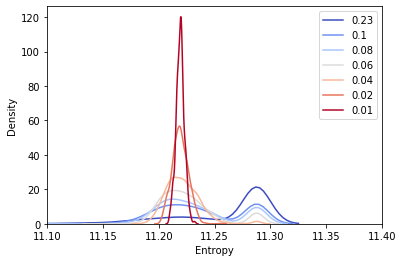

In [9]:
%matplotlib inline
var_list = [0.23,0.1,0.08,0.06,0.04,0.02,0.01] #
color1=cm.coolwarm(np.linspace(0,1,len(var_list)))

fig, ax = plt.subplots()

for var,c in zip(var_list,color1):
    filename = 'circuit%r_variant%svar%r_%s_%s_L%r_J%r_T%r_N%r'%(circuit_n,variant,var, shape,mechanism,L,J,T,N)
    hks= pickle.load( open(modelling_home + '/3954/numerical_confocal/results/entropy/EntropyDicts/HKSdict_%s.pkl'%filename, 'rb' ) )
    sns.kdeplot(data=list(hks.values()),color=c,label=var)
ax.legend()
# ax.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left')


# plt.tight_layout()
plt.xlim(11.1,11.4)
plt.xlabel('Entropy')
plt.savefig('entropy_distributions',  dpi=1200)